## DBSCAN Clustering

Muhammad Haekal Muhyidin Al-Araby - 5024221030

Algoritma clustering DBSCAN menggunakan kepadatan data untuk menentukan cluster sehingga dapat berbentuk sembarang

Pada code dibawah kita mencari cluster dari lokasi AirBnb dengan mengambil 10000 sample data latitude dan longitude 

datasets : https://www.kaggle.com/datasets/paramvir705/airbnb-data?resource=download

Kita menggunakan 0.5 sebagai epsilon dan 4 sebagai minimal tetangga atau points. Didapat terdapat 6 cluster pada data.

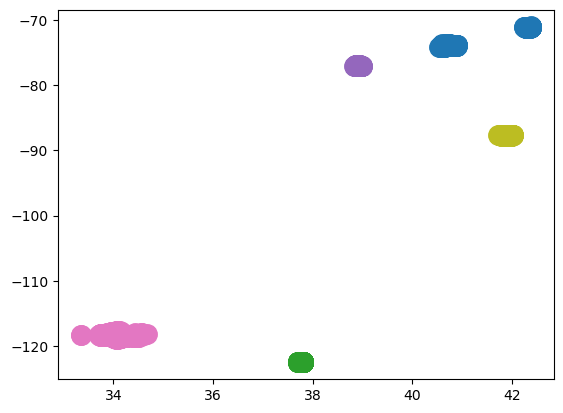

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd


def lib_clustering():
    data = pd.read_csv('Airbnb_Data.csv', nrows=10000)
    X = np.column_stack((data['latitude'], data['longitude']))
 
    dbscan = DBSCAN(eps=0.5, min_samples=4)

    # Algoritma Pengelompokan 
    dbscan.fit(X)
    labels = dbscan.labels_

    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True
    
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]
    
        class_member_mask = labels == k
    
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markersize=14,
        )
    
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markersize=6,
        )
    
    plt.show()

lib_clustering()